In [1]:
using Distributions
using SpecialFunctions
using StatsPlots
default(fmt=:png)

In [2]:
function FreeEnergy0(X, λ)
    -loglikelihood(Poisson(λ), X)
end

function FreeEnergy(X, a, b)
    n = length(X)
    S = sum(X)
    T = sum(x -> loggamma(x+1), X)
    -loggamma(S + a) + loggamma(a) + T - a*log(b) + (S + a)*log(n + b)
end

FreeEnergy (generic function with 1 method)

In [3]:
[(x, log(x)) for x in (1, 3, 10, 30, 100)]

5-element Vector{Tuple{Int64, Float64}}:
 (1, 0.0)
 (3, 1.0986122886681098)
 (10, 2.302585092994046)
 (30, 3.4011973816621555)
 (100, 4.605170185988092)

In [4]:
X = [2, 3, 4, 7, 8]
@show FreeEnergy0(X, 3)
@show FreeEnergy(X, 0.003, 0.001)
@show FreeEnergy(X, 0.03, 0.01)
@show FreeEnergy(X, 0.3, 0.1)
@show FreeEnergy(X, 3, 1)
@show FreeEnergy(X, 30, 10)
@show FreeEnergy(X, 300, 100)
@show FreeEnergy(X, 3000, 1000)
;

FreeEnergy0(X, 3) = 13.426029815911974
FreeEnergy(X, 0.003, 0.001) = 17.640858089913973
FreeEnergy(X, 0.03, 0.01) = 15.442248951685336
FreeEnergy(X, 0.3, 0.1) = 13.614138548870617
FreeEnergy(X, 3, 1) = 12.601675832662039
FreeEnergy(X, 30, 10) = 12.875793564181663
FreeEnergy(X, 300, 100) = 13.337166775380638
FreeEnergy(X, 3000, 1000) = 13.41659463146425


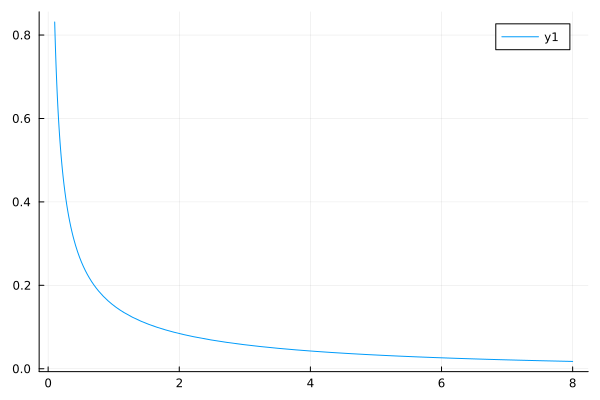

In [5]:
plot(Gamma(0.3, 1/0.1), 0.1, 8)

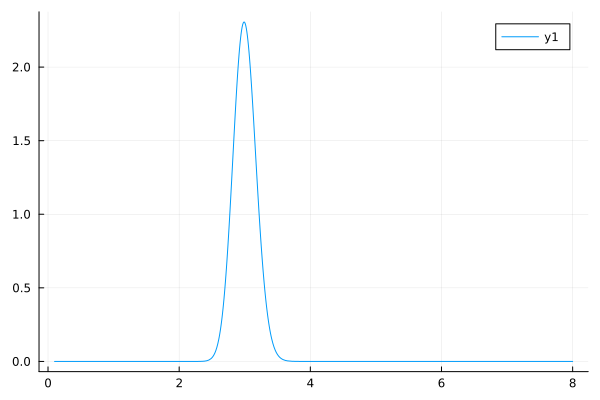

In [6]:
plot(Gamma(300, 1/100), 0.1, 8)

In [32]:
mean(X)

4.8

In [37]:
@show λ = argmin(λ -> FreeEnergy0(X, λ), 2:0.001:10)
FreeEnergy0(X, λ)

λ = argmin((λ->begin
                #= In[37]:1 =#
                FreeEnergy0(X, λ)
            end), 2:0.001:10) = 4.8


11.145942714014325

In [41]:
@show λ = mean(X)
@show b = argmin(b -> FreeEnergy(X, λ*b, b), 100:100:10^6)
FreeEnergy(X, λ*b, b)

λ = mean(X) = 4.8
b = argmin((b->begin
                #= In[41]:2 =#
                FreeEnergy(X, λ * b, b)
            end), 100:100:10 ^ 6) = 997100


11.145945206284523

In [43]:
@show (λ, b) = argmin(((λ, b),) -> FreeEnergy(X, λ*b, b), Iterators.product(0.1:0.1:10, 1000:1000:10000000))
FreeEnergy(X, λ*b, b)

(λ, b) = argmin((((λ, b),)->begin
                #= In[43]:1 =#
                FreeEnergy(X, λ * b, b)
            end), Iterators.product(0.1:0.1:10, 1000:1000:10000000)) = (4.8, 8341000)


11.145942687988281